# KNN 귤 vs 분류

In [2]:
!gdown https://raw.githubusercontent.com/devdio/datasets/main/citrus.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/citrus.csv
To: C:\workspace\flyai\citrus.csv

  0%|          | 0.00/62.1k [00:00<?, ?B/s]
308kB [00:00, 9.33MB/s]                    


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier

In [77]:
ct = pd.read_csv('citrus.csv')
ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [78]:
# Data의 이름 종류
ct['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

In [79]:
# orange / graphfruit 슬라이스
orange_df = ct.iloc[:5000, :]
graphfruit_df = ct.iloc[5000:, :]

In [5]:
# name -> 수치화
# orange -> 0
# graphfruit -> 1

ct['name'] = ct['name'].map({
    'orange' : 0,
    'grapefruit' : 1
})

In [6]:
ct

,name,diameter,weight,red,green,blue
0,0,2.96,86.76,172,85,2
1,0,3.91,88.05,166,78,3
2,0,4.42,95.17,156,81,2
3,0,4.47,95.60,163,81,4
4,0,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,1,15.35,253.89,149,77,20
9996,1,15.41,254.67,148,68,7
9997,1,15.59,256.50,168,82,20
9998,1,15.92,260.14,142,72,11


In [7]:
X = ct.iloc[:, 1:] # 컬럼들
Y = ct.iloc[:, 0] # 과일 이름

In [8]:
X, Y = shuffle(X, Y)

In [9]:
t = int(len(X)*0.8)

In [10]:
X_train = X.iloc[:t, :]
X_test = X.iloc[t:, :]
Y_train = Y.iloc[:t]
Y_test = Y.iloc[t:]

In [11]:
# 데이터 각 컬럼별로 정규화

mu = []
std = []

for col in X_train.columns:
    mu = X_train[col].mean()
    std = X_train[col].std()
    X_train[col] = (X_train[col] - mu)/std
    X_test[col] = (X_test[col] - mu)/std

C:\Users\014\AppData\Local\Temp\ipykernel_16472\3985100547.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = (X_train[col] - mu)/std
C:\Users\014\AppData\Local\Temp\ipykernel_16472\3985100547.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = (X_test[col] - mu)/std


In [12]:
# sklearn에 넣기위해 nparray 형태로 변경
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

In [67]:
kn = KNeighborsClassifier(n_neighbors=7)

In [68]:
kn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [69]:
Y_pred = kn.predict(X_test)
Y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [70]:
kn.score(X_train, Y_train)

0.935875

In [71]:
kn.score(X_test, Y_test)

0.922

In [18]:
# 평가 지표 : metrics
# 알고리즘의 성능평가
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    
    print('accuracy : ', acc)
    print('precision : ', pre)
    print('recall : ', rec)

In [19]:
print_score(Y_test, Y_pred)

accuracy :  0.929
precision :  0.922998986828774
recall :  0.932446264073695


In [20]:
(Y_pred == Y_test).sum() / len(Y_test)

0.929

In [73]:
score = []
tmp = 0
maxi = 0
for i in range(1, len(X_train)):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train, Y_train)
    Y_pred = kn.predict(X_test)
    score = (kn.score(X_train, Y_train))
    if tmp < score:
        tmp = score
        maxi = i

print(maxi)

KeyboardInterrupt: 

In [72]:
max_socre

NameError: name 'max_socre' is not defined

In [24]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(Y_test, Y_pred)
cfm

# TT TF
# FF FT

array([[947,  76],
       [ 66, 911]], dtype=int64)

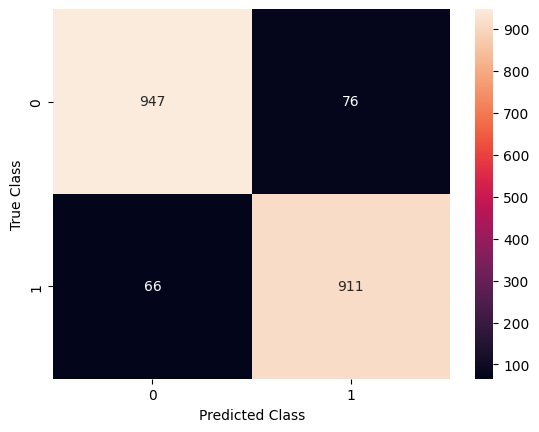

In [29]:
plt.figure()
sns.heatmap(cfm, annot=True, cbar=True, fmt='d')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

## solution

In [85]:
df = ct.copy()
# name -> 수치화
# orange -> 0
# graphfruit -> 1

df['name'] = df['name'].map({
    'orange' : 1,
    'grapefruit' : 0
})
# sns.pairplot(df, hue='name')

In [91]:
X = df.drop(['name'], axis = 1)
y = df['name']
X.head(), y.head()

(   diameter  weight  red  green  blue
 0      2.96   86.76  172     85     2
 1      3.91   88.05  166     78     3
 2      4.42   95.17  156     81     2
 3      4.47   95.60  163     81     4
 4      4.48   95.76  161     72     9,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: name, dtype: int64)

In [89]:
# train_test_split
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8000, 5) (2000, 5)
(8000,) (2000,)


In [95]:
### 공평하게 뽑혔나 확인
y_train.value_counts()

1    4021
0    3979
Name: name, dtype: int64

In [97]:
### 표준화

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) # train용 데이터를 넣어야한다.

# 데이터 스케일링
X_train_s = scaler.transform(X_train)

In [99]:
# X_train_s 의 타입을 확인
type(X_train_s)

numpy.ndarray

In [102]:
# transform 적용하면 스케일링이 완료된다.

pd.DataFrame(X_train_s)

,0,1,2,3,4
0,-0.021930,-0.063100,-0.749613,1.100194,-0.708759
1,-1.178060,-1.182231,-0.654226,1.697262,-1.041192
2,-0.062855,-0.034780,1.539682,1.270785,0.620970
3,1.502525,1.514603,1.539682,0.588421,0.953402
4,-1.014360,-1.006514,-1.035775,1.014899,-0.154706
...,...,...,...,...,...
7995,0.407782,0.375000,-0.940388,0.161944,1.064213
7996,0.269660,0.256604,1.635069,0.503126,-1.041192
7997,-1.945403,-1.921268,0.871971,1.100194,-1.041192
7998,-1.183176,-1.186667,-0.558838,1.100194,-1.041192


In [103]:
y_train

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

#### 학습

In [120]:
# 각 속성별 평균, 표준편차
scaler.mean_, scaler.var_

(array([  9.96286875, 174.85934875, 153.858625  ,  76.101375  ,
         11.396125  ]),
 array([  3.82123223, 858.98450121, 109.90538811, 137.45109811,
         81.43970998]))

In [121]:
# test용 데이터도 스케일링을 해준다.

X_test_s = scaler.transform(X_test)
y_test = y_test.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [129]:
from sklearn.neighbors import KNeighborsClassifier

score = []

# k를 3 ~ 30 넣어본다
for i in range(3, 100):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train_s, y_train)
    s = kn.score(X_train_s, y_train)
    score.append(s)

plt.plot(score)

### Best
- k = 5

In [136]:
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train_s, y_train)
s = kn.score(X_train_s, y_train)
print('accuracy : ', s)

accuracy :  0.941125


### 최종테스트

In [137]:
y_pred = kn.predict(X_test_s)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [138]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    
    print('accuracy : ', acc)
    print('precision : ', pre)
    print('recall : ', rec)

In [139]:
print_score(y_test, y_pred)

accuracy :  0.914
precision :  0.9113149847094801
recall :  0.9131767109295199


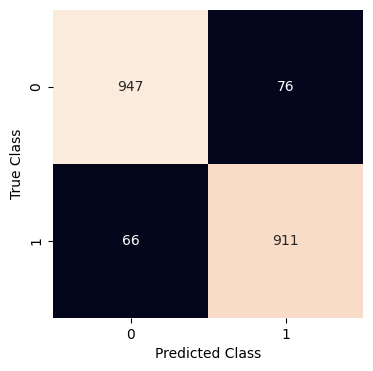

In [135]:
plt.figure(figsize=(4,4))
sns.heatmap(cfm, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()